In [2]:
# Importing the required python libraries
import numpy as np #Numpy is python package used for numerical calculations
import pandas as pd #Pandas is python package used for data manipulations
import matplotlib.pyplot as plt #matplotlib is used for data visualizations. Pyplot is used for creating different kinds of graphs, inbuilt methods for plotting is available

In [3]:
# Reading the input data present in csv file and storing it into a variable & printing the same
data=pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
#Storing output and input in separate variables for ease of use
independent = data[["YearsExperience"]] #input variable, which is independent
dependent = data[['Salary']] #output variable, which is dependent

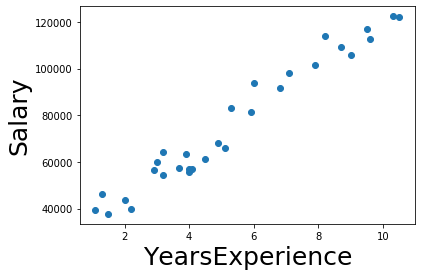

In [5]:
# To visulaize the data, we are plotting data points in a graph
plt.scatter(independent, dependent)
plt.xlabel('YearsExperience', fontsize=25)
plt.ylabel('Salary', fontsize=25)
plt.show()

In [6]:
# Splitting input data into train and test for model creation and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(independent, dependent, test_size=1/3, random_state=0)

In [7]:
# Building a linear regression model, using train data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train, y_train) #Fit method builds the model, through which we get weight(b0) and bias(b1) values  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#Viewing the weight and bias values from built linear regression model
weight = regressor.coef_
print("weight of the model={}".format(weight))
bias = regressor.intercept_
print("Intercept of the model={}".format(bias))

weight of the model=[[9345.94244312]]
Intercept of the model=[26816.19224403]


In [10]:
# Check/test built model using test data and print predicted values
y_pred = regressor.predict(X_test)
y_pred

array([[ 40835.10590871],
       [123079.39940819],
       [ 65134.55626083],
       [ 63265.36777221],
       [115602.64545369],
       [108125.8914992 ],
       [116537.23969801],
       [ 64199.96201652],
       [ 76349.68719258],
       [100649.1375447 ]])

In [11]:
# Calculating R^2 value using predicted output and actual output
from sklearn.metrics import r2_score
rSquared = r2_score(y_test,y_pred)
rSquared

0.9749154407708353

In [14]:
# Creating a new file, opening it in write mode and write created model values into it, these are carried out using pickle pkg
import pickle
fileName = 'finalized_SLR_Model.sav'
pickle.dump(regressor, open(fileName, 'wb'))

In [17]:
# Deploying model - Load the model from created file into required environment (production)
# Check/test for required input using loaded model and printing the obtained result
loaded_model = pickle.load(open('finalized_SLR_Model.sav', 'rb'))
result = loaded_model.predict([[15]])
print(result)

[[167005.32889087]]


In [20]:
# Predicting by fetching input from the user
user_input = int(input("Enter the input value to be predicted:"))

Enter the input value to be predicted:10


In [21]:
#Check/test for input entered by the user and print the same
future_prediction = regressor.predict([[user_input]]) #we can try/change different input alues according to user need
print("future_prediction={}".format(future_prediction))

future_prediction=[[120275.61667525]]
